In [7]:
import nipype.algorithms.modelgen as model   # model generation
from  nipype.interfaces import fsl, ants      
from nipype.interfaces.base import Bunch
import os,json,glob,sys
import numpy
import nibabel
import nilearn.plotting
from bids import BIDSLayout

%matplotlib inline
import matplotlib.pyplot as plt

datadir='D:\\FSL\\shared\\buff\\pipeline_data\\H01'
    
# results_dir = os.path.abspath("..\\..\\results")
# if not os.path.exists(results_dir):
#     os.mkdir(results_dir)

from nipype.caching import Memory
code_dir = os.path.join(datadir, 'code')
if not os.path.exists(code_dir):
    os.mkdir(code_dir)
mem = Memory(base_dir=code_dir)

print('Using data from',datadir)
print('Storing output in',code_dir)

Using data from D:\FSL\shared\buff\pipeline_data\H01
Storing output in D:\FSL\shared\buff\pipeline_data\H01\code


In [8]:
layout = BIDSLayout(datadir, validate=False)
layout.get(subject='001', extension=['nii', 'nii.gz'])

[<BIDSImageFile filename='D:\FSL\shared\buff\pipeline_data\H01\sub-001\anat\sub-001_T1w.nii.gz'>,
 <BIDSImageFile filename='D:\FSL\shared\buff\pipeline_data\H01\sub-001\func\sub-001_task-heat_bold.nii.gz'>]

In [9]:
# f = layout.get(subject='002', extension=['nii', 'nii.gz'])[1].path
print("number of subjects = " + str(len(layout.get_subjects())))

number of subjects = 5


In [10]:
f = layout.get(subject='001', extension=['nii', 'nii.gz'])[1].path
print("repetition time = " + str(layout.get_metadata(f)["RepetitionTime"]) + "s")
layout.get_metadata(f)

repetition time = 2.21s


{'EchoTime': '0.0028',
 'EffectiveEchoSpacing': '0.00051',
 'FlipAngle': '66',
 'MRAcquisitionType': '2D',
 'MagneticFieldStrength': '7.0',
 'Manufacturer': 'Siemens',
 'ManufacturerModelName': 'MAGNETOM',
 'PhaseEncodingDirection': 'i',
 'PulseSequenceType': 'Multiband gradient echo EPI',
 'RepetitionTime': 2.21,
 'ScanOptions': 'Partial Fourier - Phase',
 'ScanningSequence': 'EP',
 'SequenceName': 'epfid2d1_160',
 'SequenceVariant': ['segmented k-space',
  'steady state',
  'oversampling phase'],
 'TaskName': 'Heat stimulation 51 degrees 5 blocks of 20 pulses'}

In [11]:
layout.get_entities()

{'subject': <bids.layout.models.Entity at 0x1f5f7654a88>,
 'session': <bids.layout.models.Entity at 0x1f5f7641a88>,
 'task': <bids.layout.models.Entity at 0x1f5f7654d88>,
 'acquisition': <bids.layout.models.Entity at 0x1f5f7641c48>,
 'ceagent': <bids.layout.models.Entity at 0x1f5f75fd3c8>,
 'reconstruction': <bids.layout.models.Entity at 0x1f5f75fd888>,
 'direction': <bids.layout.models.Entity at 0x1f5f75fdc08>,
 'run': <bids.layout.models.Entity at 0x1f5f75fd808>,
 'proc': <bids.layout.models.Entity at 0x1f5f75fdd08>,
 'modality': <bids.layout.models.Entity at 0x1f5f75fdfc8>,
 'echo': <bids.layout.models.Entity at 0x1f5f75fd588>,
 'recording': <bids.layout.models.Entity at 0x1f5f75fd5c8>,
 'space': <bids.layout.models.Entity at 0x1f5f75f7108>,
 'suffix': <bids.layout.models.Entity at 0x1f5f7651548>,
 'scans': <bids.layout.models.Entity at 0x1f5f75f7048>,
 'fmap': <bids.layout.models.Entity at 0x1f5f75f7608>,
 'datatype': <bids.layout.models.Entity at 0x1f5f7651b08>,
 'extension': <bid

In [12]:
f = layout.get(task='heat', extension=['nii.gz'])
a = layout.get(suffix='T1w', extension=['nii.gz'])

print("functional scans:")
for i in f:
    print(" " + i.path)

print("\nAnatomical scans")
for j in a:
    print(" " + j.path)

anat = a[0].path
# print("\n" + anat)
print("\nrepetition time anatomy = " + str(layout.get_metadata(anat)["RepetitionTime"]))
layout.get_metadata(anat)

functional scans:
 D:\FSL\shared\buff\pipeline_data\H01\sub-001\func\sub-001_task-heat_bold.nii.gz
 D:\FSL\shared\buff\pipeline_data\H01\sub-002\func\sub-002_task-heat_bold.nii.gz
 D:\FSL\shared\buff\pipeline_data\H01\sub-003\func\sub-003_task-heat_bold.nii.gz
 D:\FSL\shared\buff\pipeline_data\H01\sub-004\func\sub-004_task-heat_bold.nii.gz
 D:\FSL\shared\buff\pipeline_data\H01\sub-005\func\sub-005_task-heat_bold.nii.gz

Anatomical scans
 D:\FSL\shared\buff\pipeline_data\H01\sub-001\anat\sub-001_T1w.nii.gz
 D:\FSL\shared\buff\pipeline_data\H01\sub-002\anat\sub-002_T1w.nii.gz
 D:\FSL\shared\buff\pipeline_data\H01\sub-003\anat\sub-003_T1w.nii.gz
 D:\FSL\shared\buff\pipeline_data\H01\sub-004\anat\sub-004_T1w.nii.gz
 D:\FSL\shared\buff\pipeline_data\H01\sub-005\anat\sub-005_T1w.nii.gz

repetition time anatomy = 5.0


{'EchoTime': 0.00251,
 'FlipAngle': 0.0,
 'InversionTime': 0.0,
 'MRAcquisitionType': '3D',
 'MagneticFieldStrength': 7.0,
 'Manufacturer': 'Siemens',
 'ManufacturerModelName': 'MAGNETOM',
 'RepetitionTime': 5.0,
 'ScanningSequence': 'MP2RAGE'}

In [48]:
import pandas as pd
events = pd.read_csv(os.path.join(datadir, "task-heat_events.tsv"), sep="\t")
events

,onset,duration,weight,trial_type
0,45,44,1,heat
1,133,44,1,heat
2,221,44,1,heat
3,309,44,1,heat
4,397,44,1,heat


In [49]:
for trial_type in events.trial_type.unique():
    print(events[events.trial_type == trial_type])

   onset  duration  weight trial_type
0     45        44       1       heat
1    133        44       1       heat
2    221        44       1       heat
3    309        44       1       heat
4    397        44       1       heat


In [50]:
events[events.trial_type == 'heat'].duration

0    44
1    44
2    44
3    44
4    44
Name: duration, dtype: int64

In [14]:
source_epi = layout.get(task="heat", subject="001", extension=['nii','nii.gz'])[0]
print(source_epi)
# layout.get_metadata('/data1/projects/MicroFunc/Jurjen/projects/BlockPain/task-heat_bold.nii.gz')

[<BIDSImageFile filename='D:\FSL\shared\buff\pipeline_data\H01\sub-001\func\sub-001_task-heat_bold.nii.gz'>]


In [52]:
confounds = pd.read_csv(os.path.join(datadir, "derivatives", "fmriprep", 
                                        "sub-%s"%source_epi.subject, "func", 
                                        "sub-%s_task-heat_desc-confounds_regressors.tsv"%(source_epi.subject)),
           sep="\t", na_values="n/a")
confounds.head()

/home/heij/.local/lib/python3.6/site-packages/bids/layout/models.py:175: UserWarning: Accessing entities as attributes is deprecated as of 0.7. Please use the .entities dictionary instead (i.e., .entities['subject'] instead of .subject.
  % (attr, attr))


,csf,csf_derivative1,csf_power2,csf_derivative1_power2,white_matter,white_matter_derivative1,white_matter_derivative1_power2,white_matter_power2,global_signal,global_signal_derivative1,...,rot_x_derivative1_power2,rot_x_power2,rot_y,rot_y_derivative1,rot_y_derivative1_power2,rot_y_power2,rot_z,rot_z_derivative1,rot_z_power2,rot_z_derivative1_power2
0,571.181104,NaN,326247.853562,NaN,348.437043,NaN,NaN,121408.372841,400.298963,NaN,...,NaN,1.425108e-07,-0.000000,NaN,NaN,0.000000e+00,-0.000324,NaN,1.052165e-07,NaN
1,558.848554,-12.332550,312311.706303,152.091790,347.928037,-0.509006,0.259087,121053.918737,399.165012,-1.133951,...,5.544659e-08,3.757408e-07,0.000201,0.000201,4.031100e-08,4.031100e-08,-0.000387,-0.000063,1.498387e-07,3.933673e-09
2,553.325987,-5.522567,306169.647691,30.498748,347.958053,0.030016,0.000901,121074.806690,399.629212,0.464200,...,1.248576e-07,6.740514e-08,0.000150,-0.000051,2.620416e-09,2.237597e-08,-0.000446,-0.000058,1.985148e-07,3.417572e-09
3,551.706497,-1.619489,304380.059213,2.622746,348.151652,0.193599,0.037481,121209.572757,400.449490,0.820278,...,2.639699e-07,6.459476e-08,0.000160,0.000010,1.079521e-10,2.559232e-08,-0.000525,-0.000079,2.756691e-07,6.318978e-09
4,550.880950,-0.825547,303469.821125,0.681528,348.058228,-0.093424,0.008728,121144.530156,400.575035,0.125545,...,6.437784e-07,3.005265e-07,0.000187,0.000028,7.565250e-10,3.514913e-08,-0.000357,0.000168,1.273326e-07,2.829292e-08


In [53]:
info = [Bunch(conditions=['heat'],
              onsets=[list(events[events.trial_type == 'heat'].onset)],
              durations=[list(events[events.trial_type == 'heat'].duration)],
              regressors=[list(confounds.framewise_displacement.fillna(0)[:]),
                          list(confounds.csf[:]),
                          list(confounds.white_matter[:]),
                          list(confounds.a_comp_cor_00[:]),
                          list(confounds.a_comp_cor_01[:]),
                          list(confounds.a_comp_cor_02[:]),
                          list(confounds.a_comp_cor_03[:]),
                          list(confounds.a_comp_cor_04[:]),
                          list(confounds.a_comp_cor_05[:]),
                         ],
              regressor_names=['FramewiseDisplacement',
                               'csf',
                               'wm',
                               'aCompCor0',
                               'aCompCor1',
                               'aCompCor2',
                               'aCompCor3',
                               'aCompCor4',
                               'aCompCor5',])
       ]

In [54]:
info = [Bunch(conditions=['heat'],
              onsets=[list(events[events.trial_type == 'heat'].onset)],
              durations=[list(events[events.trial_type == 'heat'].duration)])
       ]

In [55]:
func_file = os.path.join(datadir, "derivatives", "fmriprep",
                         "sub-%s"%source_epi.subject, "func",
                         "sub-%s_task-heat_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz"%(source_epi.subject))

skip = mem.cache(fsl.ExtractROI)
skip_results = skip(in_file=func_file,
                    t_min=4, t_size=-1)

200811-18:11:36,584 nipype.workflow INFO:
	 [Node] Setting-up "505db6b83d7d0f4fae51e9d74058228d" in "/data1/projects/MicroFunc/Jurjen/programs/notebooks/nipype_mem/nipype-interfaces-fsl-utils-ExtractROI/505db6b83d7d0f4fae51e9d74058228d".
200811-18:11:36,588 nipype.workflow INFO:
	 [Node] Cached "505db6b83d7d0f4fae51e9d74058228d" - collecting precomputed outputs
200811-18:11:36,589 nipype.workflow INFO:
	 [Node] "505db6b83d7d0f4fae51e9d74058228d" found cached.


/home/heij/.local/lib/python3.6/site-packages/bids/layout/models.py:175: UserWarning: Accessing entities as attributes is deprecated as of 0.7. Please use the .entities dictionary instead (i.e., .entities['subject'] instead of .subject.
  % (attr, attr))


In [59]:
s = model.SpecifyModel()
s.inputs.input_units = 'secs'
s.inputs.functional_runs = source_epi.path
s.inputs.time_repetition = layout.get_metadata(source_epi.path)["RepetitionTime"]
s.inputs.high_pass_filter_cutoff = 128.
s.inputs.subject_info = info
specify_model_results = s.run()

In [60]:
heat_cond = ['heat','T', ['heat'],[1]]
contrasts=[heat_cond]
           
level1design = mem.cache(fsl.model.Level1Design)
level1design_results = level1design(interscan_interval = layout.get_metadata(source_epi.path)["RepetitionTime"],
                                    bases = {'dgamma':{'derivs': True}},
                                    session_info = specify_model_results.outputs.session_info,
                                    model_serial_correlations=True,
                                    contrasts=contrasts)

level1design_results.outputs

200811-18:12:40,325 nipype.workflow INFO:
	 [Node] Setting-up "a2cfceed08e27d7808d25d287791d12e" in "/data1/projects/MicroFunc/Jurjen/programs/notebooks/nipype_mem/nipype-interfaces-fsl-model-Level1Design/a2cfceed08e27d7808d25d287791d12e".
200811-18:12:40,331 nipype.workflow INFO:
	 [Node] Cached "a2cfceed08e27d7808d25d287791d12e" - collecting precomputed outputs
200811-18:12:40,331 nipype.workflow INFO:
	 [Node] "a2cfceed08e27d7808d25d287791d12e" found cached.



ev_files = ['/data1/projects/MicroFunc/Jurjen/programs/notebooks/nipype_mem/nipype-interfaces-fsl-model-Level1Design/a2cfceed08e27d7808d25d287791d12e/ev_heat_0_1.txt']
fsf_files = /data1/projects/MicroFunc/Jurjen/programs/notebooks/nipype_mem/nipype-interfaces-fsl-model-Level1Design/a2cfceed08e27d7808d25d287791d12e/run0.fsf

In [43]:
modelgen = mem.cache(fsl.model.FEATModel)
modelgen_results = modelgen(fsf_file=level1design_results.outputs.fsf_files,
                            ev_files=level1design_results.outputs.ev_files)
modelgen_results.outputs

200810-17:38:29,82 nipype.workflow INFO:
	 [Node] Setting-up "eea6c81c038e6052dee759455ab542e3" in "/data1/projects/MicroFunc/Jurjen/programs/notebooks/nipype_mem/nipype-interfaces-fsl-model-FEATModel/eea6c81c038e6052dee759455ab542e3".
200810-17:38:29,96 nipype.workflow INFO:
	 [Node] Running "eea6c81c038e6052dee759455ab542e3" ("nipype.interfaces.fsl.model.FEATModel"), a CommandLine Interface with command:
feat_model run0 
200810-17:38:29,572 nipype.workflow INFO:
	 [Node] Finished "eea6c81c038e6052dee759455ab542e3".



con_file = /data1/projects/MicroFunc/Jurjen/programs/notebooks/nipype_mem/nipype-interfaces-fsl-model-FEATModel/eea6c81c038e6052dee759455ab542e3/run0.con
design_cov = /data1/projects/MicroFunc/Jurjen/programs/notebooks/nipype_mem/nipype-interfaces-fsl-model-FEATModel/eea6c81c038e6052dee759455ab542e3/run0_cov.png
design_file = /data1/projects/MicroFunc/Jurjen/programs/notebooks/nipype_mem/nipype-interfaces-fsl-model-FEATModel/eea6c81c038e6052dee759455ab542e3/run0.mat
design_image = /data1/projects/MicroFunc/Jurjen/programs/notebooks/nipype_mem/nipype-interfaces-fsl-model-FEATModel/eea6c81c038e6052dee759455ab542e3/run0.png
fcon_file = <undefined>

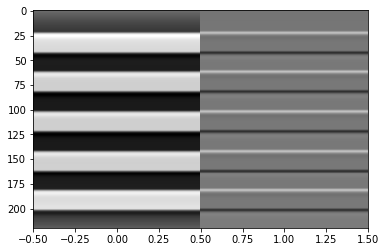

In [44]:
desmtx=numpy.loadtxt(modelgen_results.outputs.design_file,skiprows=5)
plt.imshow(desmtx,aspect='auto',interpolation='nearest',cmap='gray')

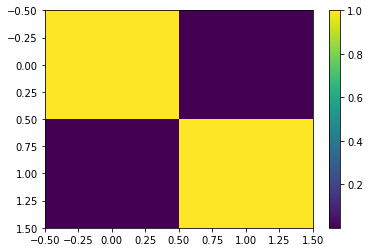

In [45]:
cc=numpy.corrcoef(desmtx.T)
plt.imshow(cc,aspect='auto',interpolation='nearest', cmap=plt.cm.viridis)
plt.colorbar()

In [46]:
mask = mem.cache(fsl.maths.ApplyMask)
mask_results = mask(in_file=func_file,
                    mask_file=os.path.join(datadir, "derivatives", "fmriprep", 
                                        "sub-%s"%source_epi.subject, "func", 
                                        "sub-%s_task-heat_space-MNI152NLin2009cAsym_res-2_desc-brain_mask.nii.gz"%(source_epi.subject)))
mask_results.outputs

200810-17:38:43,826 nipype.workflow INFO:
	 [Node] Setting-up "17676427707251f6ed9933ea15717b8f" in "/data1/projects/MicroFunc/Jurjen/programs/notebooks/nipype_mem/nipype-interfaces-fsl-maths-ApplyMask/17676427707251f6ed9933ea15717b8f".
200810-17:38:43,829 nipype.workflow INFO:
	 [Node] Cached "17676427707251f6ed9933ea15717b8f" - collecting precomputed outputs
200810-17:38:43,829 nipype.workflow INFO:
	 [Node] "17676427707251f6ed9933ea15717b8f" found cached.


/home/heij/.local/lib/python3.6/site-packages/bids/layout/models.py:175: UserWarning: Accessing entities as attributes is deprecated as of 0.7. Please use the .entities dictionary instead (i.e., .entities['subject'] instead of .subject.
  % (attr, attr))



out_file = /data1/projects/MicroFunc/Jurjen/programs/notebooks/nipype_mem/nipype-interfaces-fsl-maths-ApplyMask/17676427707251f6ed9933ea15717b8f/sub-001_task-heat_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold_masked.nii.gz

In [47]:
filmgls= mem.cache(fsl.FILMGLS)
filmgls_results = filmgls(in_file=mask_results.outputs.out_file,
                          design_file = modelgen_results.outputs.design_file,
                          tcon_file = modelgen_results.outputs.con_file,
                          fcon_file = modelgen_results.outputs.fcon_file,
                          autocorr_noestimate = True)
filmgls_results.outputs

200810-17:38:47,488 nipype.workflow INFO:
	 [Node] Setting-up "7253a8590666b6b20a60e779cdd92ebb" in "/data1/projects/MicroFunc/Jurjen/programs/notebooks/nipype_mem/nipype-interfaces-fsl-model-FILMGLS/7253a8590666b6b20a60e779cdd92ebb".
200810-17:38:47,501 nipype.workflow INFO:
	 [Node] Running "7253a8590666b6b20a60e779cdd92ebb" ("nipype.interfaces.fsl.model.FILMGLS"), a CommandLine Interface with command:
film_gls --noest --rn=results --con=/data1/projects/MicroFunc/Jurjen/programs/notebooks/nipype_mem/nipype-interfaces-fsl-model-FEATModel/eea6c81c038e6052dee759455ab542e3/run0.con --in=/data1/projects/MicroFunc/Jurjen/programs/notebooks/nipype_mem/nipype-interfaces-fsl-maths-ApplyMask/17676427707251f6ed9933ea15717b8f/sub-001_task-heat_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold_masked.nii.gz --pd=/data1/projects/MicroFunc/Jurjen/programs/notebooks/nipype_mem/nipype-interfaces-fsl-model-FEATModel/eea6c81c038e6052dee759455ab542e3/run0.mat --thr=-1000.000000
200810-17:38:47,564 nipyp


copes = /data1/projects/MicroFunc/Jurjen/programs/notebooks/nipype_mem/nipype-interfaces-fsl-model-FILMGLS/7253a8590666b6b20a60e779cdd92ebb/results/cope1.nii.gz
dof_file = /data1/projects/MicroFunc/Jurjen/programs/notebooks/nipype_mem/nipype-interfaces-fsl-model-FILMGLS/7253a8590666b6b20a60e779cdd92ebb/results/dof
fstats = <undefined>
logfile = /data1/projects/MicroFunc/Jurjen/programs/notebooks/nipype_mem/nipype-interfaces-fsl-model-FILMGLS/7253a8590666b6b20a60e779cdd92ebb/results/logfile
param_estimates = ['/data1/projects/MicroFunc/Jurjen/programs/notebooks/nipype_mem/nipype-interfaces-fsl-model-FILMGLS/7253a8590666b6b20a60e779cdd92ebb/results/pe1.nii.gz', '/data1/projects/MicroFunc/Jurjen/programs/notebooks/nipype_mem/nipype-interfaces-fsl-model-FILMGLS/7253a8590666b6b20a60e779cdd92ebb/results/pe2.nii.gz']
residual4d = /data1/projects/MicroFunc/Jurjen/programs/notebooks/nipype_mem/nipype-interfaces-fsl-model-FILMGLS/7253a8590666b6b20a60e779cdd92ebb/results/res4d.nii.gz
results_dir

/data1/projects/MicroFunc/Jurjen/programs/notebooks/nipype_mem/nipype-interfaces-fsl-model-FILMGLS/7253a8590666b6b20a60e779cdd92ebb/results/zstat1.nii.gz


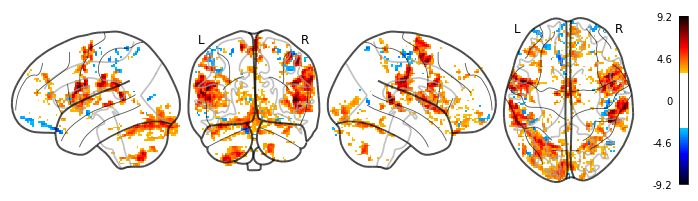

In [48]:
zstat = os.path.join(os.path.dirname(filmgls_results.outputs.zstats), os.path.basename(filmgls_results.outputs.zstats))
print(zstat)
nilearn.plotting.plot_glass_brain(nilearn.image.smooth_img(zstat, 3),
                                  display_mode='lyrz', colorbar=True, 
                                  plot_abs=False, threshold=3.1)

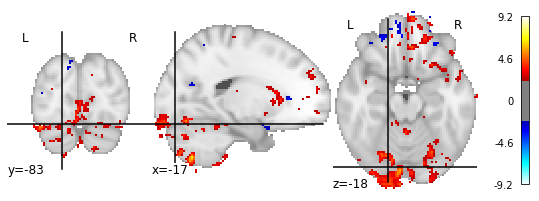

In [49]:
nilearn.plotting.plot_stat_map(nilearn.image.smooth_img(zstat, 3),
                               colorbar=True, threshold=2.3)

In [1]:
import nipype.algorithms.modelgen as model   # model generation
from  nipype.interfaces import fsl, ants      
from nipype.interfaces.base import Bunch
import os,json,glob,sys
import numpy
import nibabel
import nilearn.plotting
from bids import BIDSLayout
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

loc = "vm"
if loc == "vm":
    datadir = '/mnt/hgfs/shared/buff/pipeline_data/H01'
else:
    datadir='D:\\FSL\\shared\\buff\\pipeline_data\\H01'
    
# results_dir = os.path.abspath("..\\..\\results")
# if not os.path.exists(results_dir):
#     os.mkdir(results_dir)

from nipype.caching import Memory
code_dir = os.path.join(datadir, 'code')
if not os.path.exists(code_dir):
    os.mkdir(code_dir)
mem = Memory(base_dir=code_dir)

print('Using data from',datadir)
print('Storing output in',code_dir)

copes = {}
zstats = {}

layout = BIDSLayout(datadir, validate=False)
nr_subjects = len(layout.get_subjects())

for i in range(nr_subjects):
    
    print("\n**********************************************", "sub-00" + str(i+1), "**********************************************")
    
    source_epi = layout.get(task="heat", extension=['nii', 'nii.gz'])[i]
    
    events = pd.read_csv(os.path.join(datadir, "task-heat_events.tsv"), sep="\t")

    confounds = pd.read_csv(os.path.join(datadir, "derivatives", "fmriprep", 
                                            "sub-%s"%source_epi.subject, "func", 
                                            "sub-%s_task-heat_desc-confounds_regressors.tsv"%(source_epi.subject)),
               sep="\t", na_values="n/a")

    info = [Bunch(conditions=['heat'],
                  onsets=[list(events[events.trial_type == 'heat'].onset)],
                  durations=[list(events[events.trial_type == 'heat'].duration)])
           ]

#     skip = mem.cache(fsl.ExtractROI)
#     skip_results = skip(in_file=os.path.join(datadir, "derivatives", "fmriprep", 
#                                             "sub-%s"%source_epi.subject, "func", 
#                                             "sub-%s_task-heat_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz"%(source_epi.subject)),
#                          t_min=4, t_size=-1)

    s = model.SpecifyModel()
    s.inputs.input_units = 'secs'
    s.inputs.functional_runs = source_epi.path
    s.inputs.time_repetition = layout.get_metadata(source_epi.path)["RepetitionTime"]
    s.inputs.high_pass_filter_cutoff = 128
    s.inputs.subject_info = info
    specify_model_results = s.run()
    
    heat_cond = ['heat','T', ['heat'],[1]]
    contrasts=[heat_cond]

    level1design = mem.cache(fsl.model.Level1Design)
    level1design_results = level1design(interscan_interval = layout.get_metadata(source_epi.path)["RepetitionTime"],
                                        bases = {'dgamma':{'derivs': True}},
                                        session_info = specify_model_results.outputs.session_info,
                                        model_serial_correlations=True,
                                        contrasts=contrasts)
    
    modelgen = mem.cache(fsl.model.FEATModel)
    modelgen_results = modelgen(fsf_file=level1design_results.outputs.fsf_files,
                                ev_files=level1design_results.outputs.ev_files)
    
    mask_file = os.path.join(datadir, 
                             "derivatives",
                             "fmriprep", 
                             "sub-%s"%source_epi.subject,
                             "func",
                             "sub-%s_task-heat_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold_masked.nii.gz"%source_epi.subject)
    if os.path.isfile(mask_file):
        
        mask_file = mask_file
    
    else:
         
        mask = mem.cache(fsl.maths.ApplyMask)
        mask_results = mask(in_file=source_epi.path,
                            mask_file=os.path.join(datadir, "derivatives", "fmriprep", 
                                            "sub-%s"%source_epi.subject, "func", 
                                            "sub-%s_task-heat_space-MNI152NLin2009cAsym_res-2_desc-brain_mask.nii.gz"%(source_epi.subject)))
        mask_file = mask_results.outputs.out_file

    filmgls= mem.cache(fsl.FILMGLS)
    filmgls_results = filmgls(in_file=mask_file,
                              design_file = modelgen_results.outputs.design_file,
                              tcon_file = modelgen_results.outputs.con_file,
                              fcon_file = modelgen_results.outputs.fcon_file,
                              autocorr_noestimate = True)
                                                                                                                             
#     copes[source_epi.subject] = list.append(filmgls_results.outputs.copes)
#     zstats[source_epi.subject] = list.append(filmgls_results.outputs.zstats)

    copes[source_epi.subject] = filmgls_results.outputs.copes
    zstats[source_epi.subject] = filmgls_results.outputs.zstats

Using data from /mnt/hgfs/shared/buff/pipeline_data/H01
Storing output in /mnt/hgfs/shared/buff/pipeline_data/H01/code

********************************************** sub-001 **********************************************


/usr/local/lib/python3.6/site-packages/bids/layout/models.py:155: UserWarning: Accessing entities as attributes is deprecated as of 0.7. Please use the .entities dictionary instead (i.e., .entities['subject'] instead of .subject.
  % (attr, attr))


200814-17:57:15,763 nipype.workflow INFO:
	 [Node] Setting-up "d7df3f8f2c790b736c1c4d2c4038263d" in "/mnt/hgfs/shared/buff/pipeline_data/H01/code/nipype_mem/nipype-interfaces-fsl-model-Level1Design/d7df3f8f2c790b736c1c4d2c4038263d".
200814-17:57:15,888 nipype.workflow INFO:
	 [Node] Cached "d7df3f8f2c790b736c1c4d2c4038263d" - collecting precomputed outputs
200814-17:57:15,911 nipype.workflow INFO:
	 [Node] "d7df3f8f2c790b736c1c4d2c4038263d" found cached.
200814-17:57:15,981 nipype.workflow INFO:
	 [Node] Setting-up "f7c72c34d31447b3a03850ad17b09681" in "/mnt/hgfs/shared/buff/pipeline_data/H01/code/nipype_mem/nipype-interfaces-fsl-model-FEATModel/f7c72c34d31447b3a03850ad17b09681".
200814-17:57:16,125 nipype.workflow INFO:
	 [Node] Cached "f7c72c34d31447b3a03850ad17b09681" - collecting precomputed outputs
200814-17:57:16,145 nipype.workflow INFO:
	 [Node] "f7c72c34d31447b3a03850ad17b09681" found cached.
200814-17:57:16,202 nipype.workflow INFO:
	 [Node] Setting-up "fb0813fa2219bf3220e348

/usr/local/lib/python3.6/site-packages/bids/layout/models.py:155: UserWarning: Accessing entities as attributes is deprecated as of 0.7. Please use the .entities dictionary instead (i.e., .entities['subject'] instead of .subject.
  % (attr, attr))


200814-17:57:17,644 nipype.workflow INFO:
	 [Node] Setting-up "c3b3f53da9970b7f6b6c867ce71d63bd" in "/mnt/hgfs/shared/buff/pipeline_data/H01/code/nipype_mem/nipype-interfaces-fsl-model-Level1Design/c3b3f53da9970b7f6b6c867ce71d63bd".
200814-17:57:17,743 nipype.workflow INFO:
	 [Node] Cached "c3b3f53da9970b7f6b6c867ce71d63bd" - collecting precomputed outputs
200814-17:57:17,750 nipype.workflow INFO:
	 [Node] "c3b3f53da9970b7f6b6c867ce71d63bd" found cached.
200814-17:57:17,784 nipype.workflow INFO:
	 [Node] Setting-up "469d71eb8c8e758958edcd5e217358c5" in "/mnt/hgfs/shared/buff/pipeline_data/H01/code/nipype_mem/nipype-interfaces-fsl-model-FEATModel/469d71eb8c8e758958edcd5e217358c5".
200814-17:57:17,870 nipype.workflow INFO:
	 [Node] Cached "469d71eb8c8e758958edcd5e217358c5" - collecting precomputed outputs
200814-17:57:17,901 nipype.workflow INFO:
	 [Node] "469d71eb8c8e758958edcd5e217358c5" found cached.
200814-17:57:17,987 nipype.workflow INFO:
	 [Node] Setting-up "1f99d040af601b1e9db218

In [5]:
print(copes.items())

dict_items([('001', '/mnt/hgfs/shared/buff/pipeline_data/H01/code/nipype_mem/nipype-interfaces-fsl-model-FILMGLS/fb0813fa2219bf3220e34800419f5633/results/cope1.nii.gz'), ('002', '/mnt/hgfs/shared/buff/pipeline_data/H01/code/nipype_mem/nipype-interfaces-fsl-model-FILMGLS/1f99d040af601b1e9db218deea9f8659/results/cope1.nii.gz'), ('003', '/mnt/hgfs/shared/buff/pipeline_data/H01/code/nipype_mem/nipype-interfaces-fsl-model-FILMGLS/40e5a276186b0a1909c1c723e1fe4dcb/results/cope1.nii.gz'), ('004', '/mnt/hgfs/shared/buff/pipeline_data/H01/code/nipype_mem/nipype-interfaces-fsl-model-FILMGLS/128eb79b63305853fcfd9584d63c584b/results/cope1.nii.gz'), ('005', '/mnt/hgfs/shared/buff/pipeline_data/H01/code/nipype_mem/nipype-interfaces-fsl-model-FILMGLS/4844bb311920889dcca221c3b38669da/results/cope1.nii.gz')])


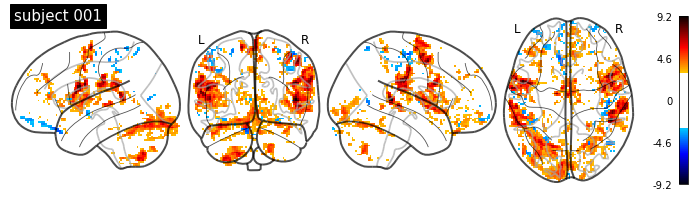

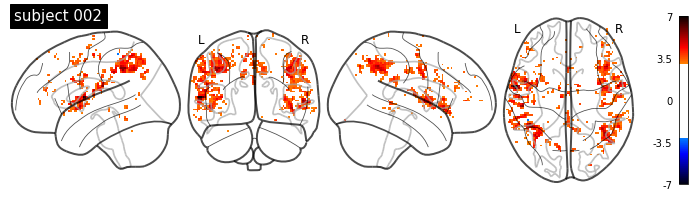

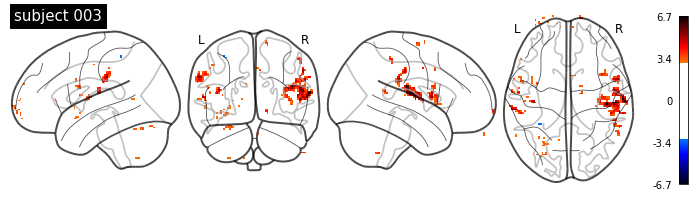

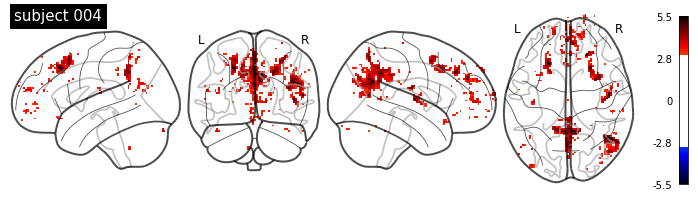

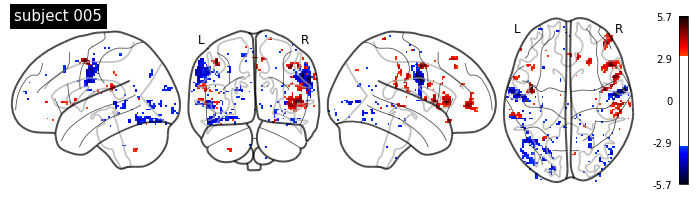

In [3]:
for i in zstats:
    
    nilearn.plotting.plot_glass_brain(nilearn.image.smooth_img(zstats[i], 3),
                                      display_mode='lyrz', colorbar=True,
                                      plot_abs=False,
                                      threshold=3.1, title='subject %s'%i)

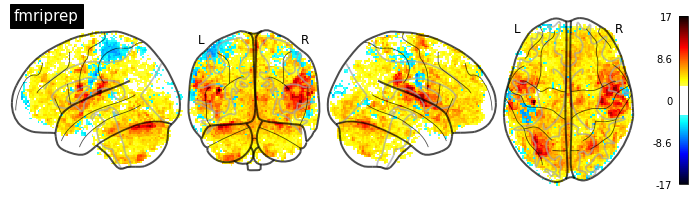

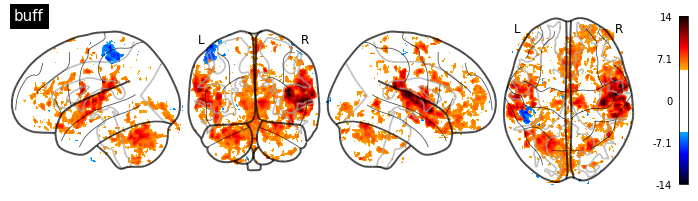

In [10]:
import nilearn.plotting

fwe_stat = [os.path.join(datadir, 'derivatives', 'fsl_feat', 'level2', 'fixed_3.1_sub001-005.gfeat', 'cope1.feat', 'stats', 'zstat1_fmriprep.nii.gz'),
           os.path.join(datadir, 'derivatives', 'fsl_feat', 'level2', 'fixed_3.1_sub001-005.gfeat', 'cope1.feat', 'stats', 'zstat1_buff.nii.gz')]

zstat = ['/data1/projects/MicroFunc/Jurjen/projects/BlockPain/derivatives/fsl_feat/level2/fixed_3.1_sub001-005.gfeat/cope1.feat/stats/zstat1.nii.gz',
         '/data1/projects/MicroFunc/Jurjen/projects/BlockPain/derivatives/fsl_feat/level2/fixed_3.1_sub001-005.gfeat/cope1.feat/stats/zstat1_buff.nii.gz']
# for i in fwe_stat:
    
#     nilearn.plotting.plot_glass_brain(i,
#                                       display_mode='lyrz', 
#                                       plot_abs=False, threshold=5.4, colorbar=True)
    
fig_fprep = nilearn.plotting.plot_glass_brain(zstat[0],
                                  display_mode='lyrz', title='fmriprep',
                                  plot_abs=False, threshold=3.1, colorbar=True)

fig_buff = nilearn.plotting.plot_glass_brain(fwe_stat[1],
                                  display_mode='lyrz', title='buff',
                                  plot_abs=False, threshold=5.4, colorbar=True)

In [15]:
# fig_fprep.savefig(os.path.join(os.path.dirname(fwe_stat[0]), 'zstat1_fprep.png'))
# fig_buff.savefig(os.path.join(os.path.dirname(fwe_stat[1]), 'zstat1_buff.png'))

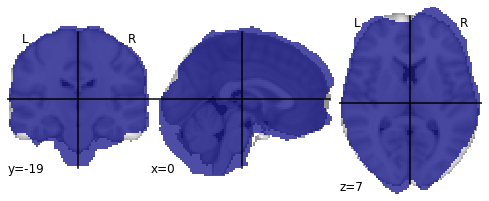

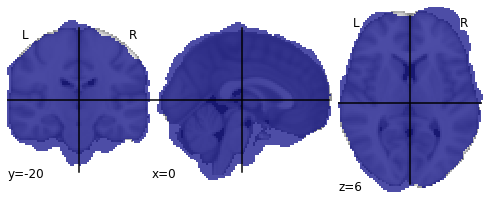

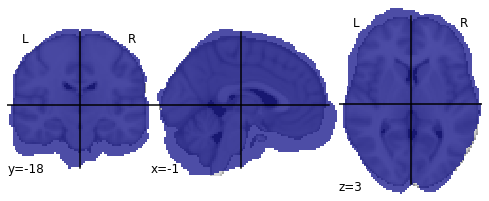

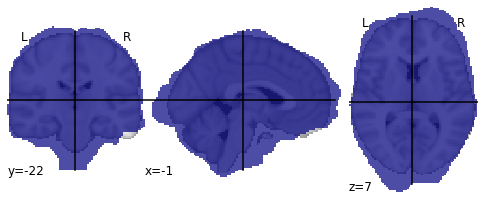

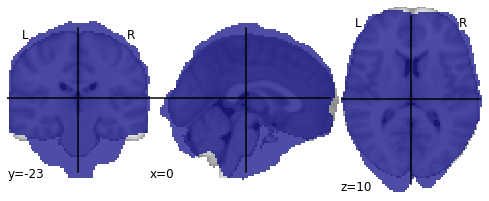

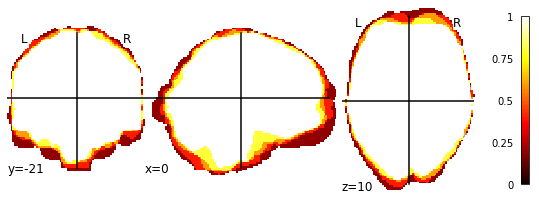

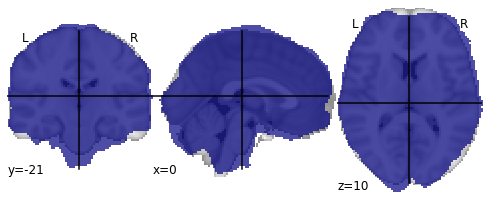

In [11]:
brainmasks = glob.glob(os.path.join(datadir, "derivatives", "fmriprep", "sub-*", "func", "*task-heat_*space-MNI152NLin2009cAsym*_desc-brain_mask.nii.gz*"))

for mask in brainmasks:
    nilearn.plotting.plot_roi(mask)
    
mean_mask = nilearn.image.mean_img(brainmasks)
nilearn.plotting.plot_stat_map(mean_mask)
group_mask = nilearn.image.math_img("a>=0.95", a=mean_mask)
nilearn.plotting.plot_roi(group_mask)

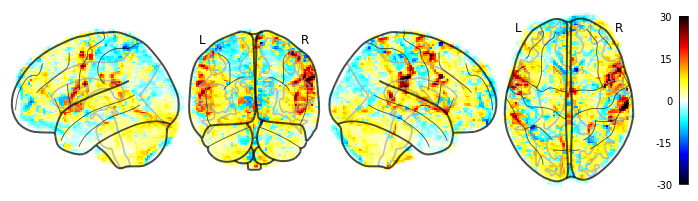

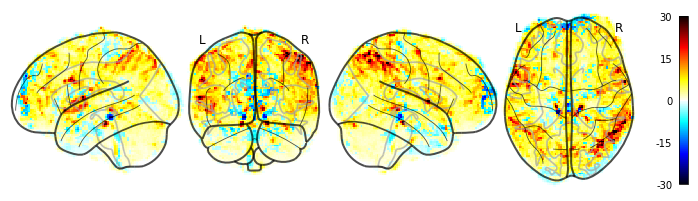

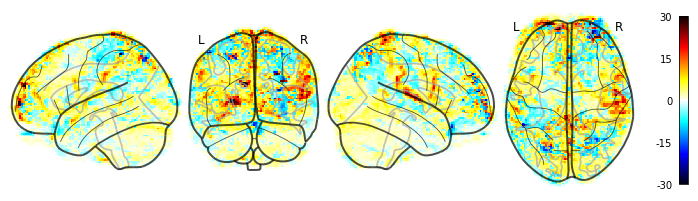

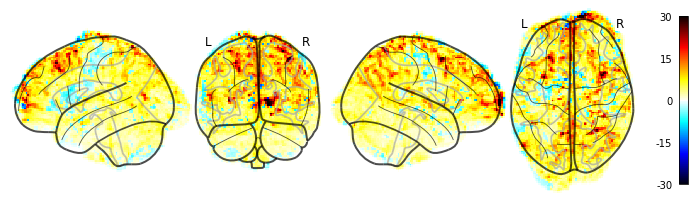

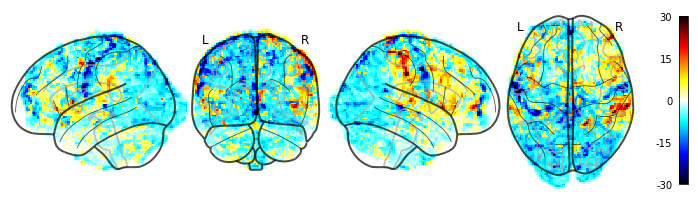

In [63]:
smooth_copes = []
i = 0
for k,v in copes.items():
    i += 1
    smooth_cope = nilearn.image.smooth_img(v[:], 3)
    smooth_cope.to_filename(os.path.join(datadir, "derivatives", "custom_modelling", f'cope{i}.nii.gz'))
    smooth_copes.append(smooth_cope)
    nilearn.plotting.plot_glass_brain(smooth_cope,
                                      display_mode='lyrz', 
                                      colorbar=True, 
                                      plot_abs=False, 
                                      vmax=30)

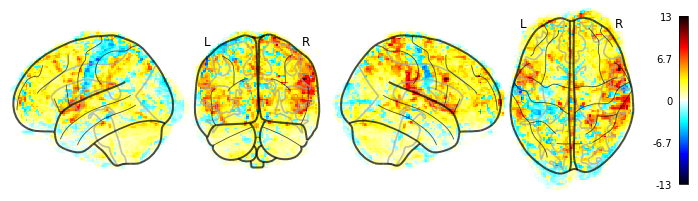

In [22]:
nilearn.plotting.plot_glass_brain(nilearn.image.mean_img(smooth_copes),
                                  display_mode='lyrz', 
                                  colorbar=True, 
                                  plot_abs=False)

In [23]:
!mkdir -p {datadir}/derivatives/custom_modelling/

copes_concat = nilearn.image.concat_imgs(smooth_copes, auto_resample=True)
copes_concat.to_filename(os.path.join(datadir, "derivatives", "custom_modelling", "mean_copes.nii.gz"))

group_mask = nilearn.image.resample_to_img(group_mask, copes_concat, interpolation='nearest')
group_mask.to_filename(os.path.join(datadir, "derivatives", "custom_modelling", "group_mask.nii.gz"))

In [25]:
randomise = mem.cache(fsl.Randomise)
randomise_results = randomise(in_file=os.path.join(datadir, "derivatives", "custom_modelling", "mean_copes.nii.gz"),
                              mask=os.path.join(datadir, "derivatives", "custom_modelling", "group_mask.nii.gz"),
                              one_sample_group_mean=True,
                              tfce=True,
                              vox_p_values=True,
                              num_perm=500)
randomise_results.outputs

200814-18:23:54,523 nipype.workflow INFO:
	 [Node] Setting-up "1801bd23f6c019ae5371c4c13c09c680" in "/mnt/hgfs/shared/buff/pipeline_data/H01/code/nipype_mem/nipype-interfaces-fsl-model-Randomise/1801bd23f6c019ae5371c4c13c09c680".
200814-18:23:54,775 nipype.workflow INFO:
	 [Node] Running "1801bd23f6c019ae5371c4c13c09c680" ("nipype.interfaces.fsl.model.Randomise"), a CommandLine Interface with command:
randomise -i /mnt/hgfs/shared/buff/pipeline_data/H01/derivatives/custom_modelling/mean_copes.nii.gz -o "randomise" -m /mnt/hgfs/shared/buff/pipeline_data/H01/derivatives/custom_modelling/group_mask.nii.gz -n 500 -1 -T -x
200814-18:23:55,161 nipype.interface INFO:
	 stdout 2020-08-14T18:23:55.161457:randomise options: -i /mnt/hgfs/shared/buff/pipeline_data/H01/derivatives/custom_modelling/mean_copes.nii.gz -o randomise -m /mnt/hgfs/shared/buff/pipeline_data/H01/derivatives/custom_modelling/group_mask.nii.gz -n 500 -1 -T -x 
200814-18:23:57,625 nipype.interface INFO:
	 stdout 2020-08-14T18:


f_corrected_p_files = []
f_p_files = []
fstat_files = []
t_corrected_p_files = ['/mnt/hgfs/shared/buff/pipeline_data/H01/code/nipype_mem/nipype-interfaces-fsl-model-Randomise/1801bd23f6c019ae5371c4c13c09c680/randomise_tfce_corrp_tstat1.nii.gz']
t_p_files = []
tstat_files = ['/mnt/hgfs/shared/buff/pipeline_data/H01/code/nipype_mem/nipype-interfaces-fsl-model-Randomise/1801bd23f6c019ae5371c4c13c09c680/randomise_tstat1.nii.gz']

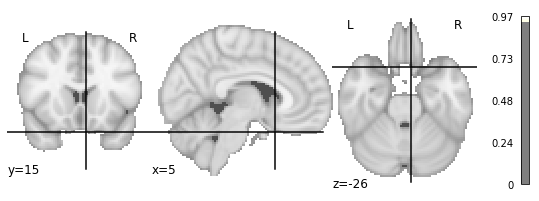

In [56]:
nilearn.plotting.plot_stat_map(randomise_results.outputs.t_corrected_p_files[0], threshold=0.95)

/usr/local/lib/python3.6/site-packages/nilearn/plotting/displays.py:99: UserWarning: No contour levels were found within the data range.
  **kwargs)


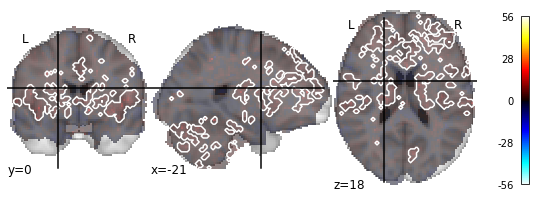

In [27]:
fig = nilearn.plotting.plot_stat_map(randomise_results.outputs.tstat_files[0], alpha=0.5, cut_coords=(-21, 0, 18))
fig.add_contours(randomise_results.outputs.t_corrected_p_files[0], levels=[0.95], colors='w')


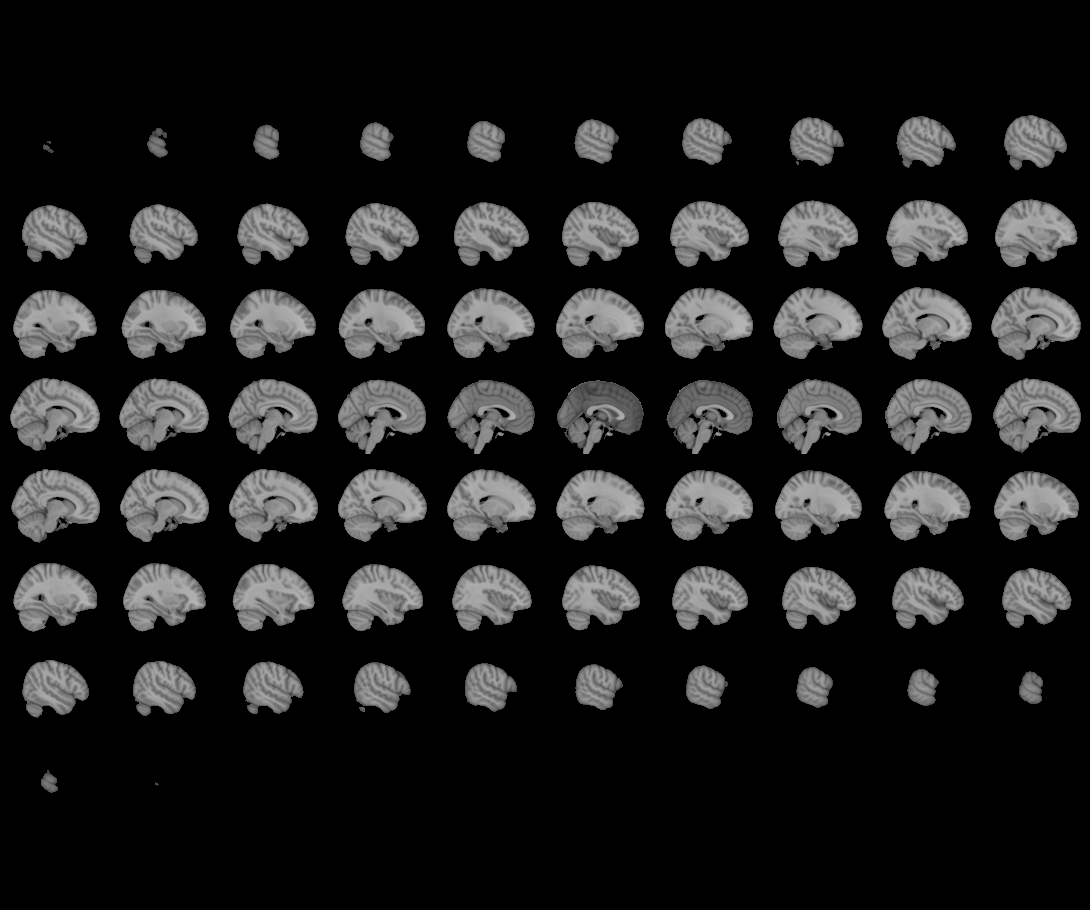
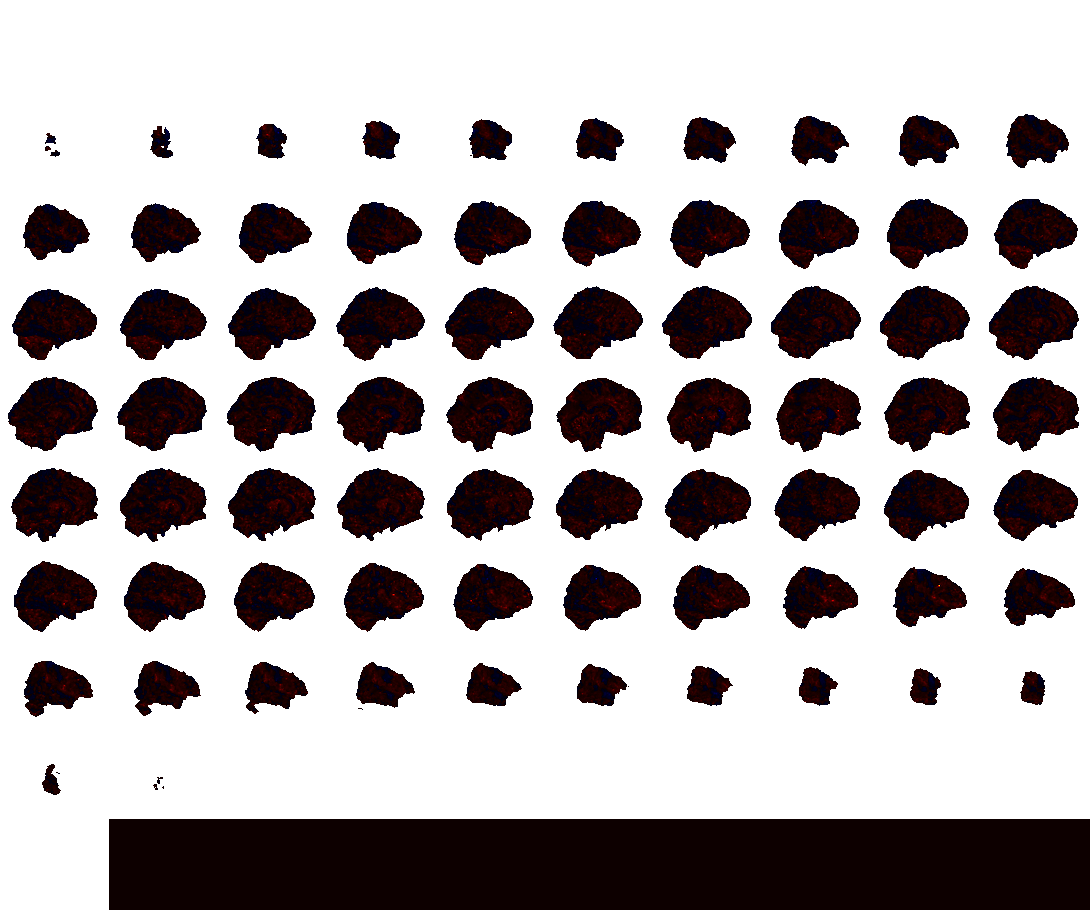

In [60]:
view = nilearn.plotting.view_img(randomise_results.outputs.tstat_files[0], alpha=0.5)
view